<a href="https://colab.research.google.com/github/uma-giriraj/Security-issues-in-Near-Field-Communication/blob/main/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import matplotlib.pyplot as plt
import keras
import pickle as pk
from keras.models import Sequential
from keras.layers import Reshape, Dropout, Dense, Activation, BatchNormalization
from keras.layers import Conv2D, ZeroPadding2D,GlobalAveragePooling2D,Flatten
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import pdb




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

iq_data = pk.load(open('/content/drive/MyDrive/RML2016.10a_dict.dat','rb'),encoding ='latin1')


print('Dataset imported')


snrs,modulation = map(lambda j: sorted(list(set(map(lambda x: x[j], iq_data.keys())))), [1,0])


print('Modulation labels: {}'.format(modulation))
print('SNR values for each modulation: {}'.format(snrs))

x_data = []
label = []
for m in modulation:
  for snr in snrs:
    x_data.append(iq_data[(m,snr)])
    for l in np.arange(iq_data[(m,snr)].shape[0]):
      label.append((m,snr))

x_stacked = np.vstack(x_data)



######
print('Dataset shape: {}'.format(x_stacked.shape))



Dataset imported
Modulation labels: ['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
SNR values for each modulation: [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
Dataset shape: (220000, 2, 128)


In [ ]:

np.random.seed(200)
N_samples = x_stacked.shape[0]

N_train = int(N_samples*0.7)

train_Idx = np.random.choice(np.arange(N_samples),size=N_train,replace=False)

total_N = np.arange(N_samples)

test_Idx = list(set(total_N)-set(train_Idx))

x_train = x_stacked[train_Idx]
x_test = x_stacked[test_Idx]
print(x_train.shape,x_test.shape)

(154000, 2, 128) (66000, 2, 128)


In [ ]:
input_encode = lambda x: modulation.index(label[x][0])
y_list_train= np.array(list(map(input_encode,train_Idx)),dtype='float32')
y_list_test = np.array(list(map(input_encode,test_Idx)),dtype='float32')
print(len(y_list_train),len(y_list_test))


154000 66000


In [ ]:
y_train = to_categorical(y_list_train,len(modulation))
y_test = to_categorical(y_list_test,len(modulation))


In [ ]:
print('Number of Samples, height, width')
print(x_train.shape)


N,H,W = x_train.shape
N_test = x_test.shape[0]
C = 1

x_train = x_train.reshape(N,H,W,C)
x_test  = x_test.reshape(N_test,H,W,C)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


Number of Samples, height, width
(154000, 2, 128)
(154000, 2, 128, 1) (66000, 2, 128, 1)
(154000, 11) (66000, 11)


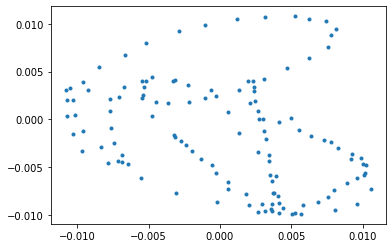

In [ ]:
plt.plot(x_train[0,0,:],x_train[0,1,:],'.')

In [ ]:
model=Sequential()
model.add(Conv2D(256, (3, 3), activation= 'relu', padding='same', inita'glorot_uniform:, input_shape=(2,128,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2), padding= 'valid', data_format=None))
model.add(layers.Dropout(.3))
model.add(Conv2D(128, (3, 3), activation= 'relu', init=" 'glorot_uniform', paddings'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2), padding= 'valid', data_format=None))
model.add(layers.Dropout(.3))
model.add(Conv2D(64, (3, 3), activation= 'relu', inita'glorot_uniform', paddings' same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2), padding= 'valid', data_format=None))
model.add(layers.Dropout(.3))
model.add(Conv2D(64, (3, 3), activation= 'relu', inite'glorot_uniform:, paddings' same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2), padding= 'valid', data_format=None))
model.add(layers.Dropout(.3))
model.add(Flatten())
model.add(Dense(128, activation= *relu', init= 'he_normal'))
model.add(BatchNormalization())
model.add(Dense(11, activation=' 'softmax', init= 'he_normal'))


SyntaxError: ignored

In [ ]:
# CNN
model = Sequential(name='CNN_Architecture')

model.add(ZeroPadding2D((0,2),data_format='channels_last'))

model.add(Conv2D(64,(2,3),activation= 'relu',data_format='channels_last',input_shape= (H,W,C),name = 'conv1'))
model.add(Dropout(0.5))
model.add(Conv2D(80,(1,3),activation= 'relu',data_format='channels_last'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(len(modulation),activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.build(input_shape = (None,H,W,C))
model.summary()


Model: "CNN_Architecture"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 2, 132, 1)        0         
 2D)                                                             
                                                                 
 conv1 (Conv2D)              (None, 1, 130, 64)        448       
                                                                 
 dropout (Dropout)           (None, 1, 130, 64)        0         
                                                                 
 conv2d (Conv2D)             (None, 1, 128, 80)        15440     
                                                                 
 dropout_1 (Dropout)         (None, 1, 128, 80)        0         
                                                                 
 flatten (Flatten)           (None, 10240)             0         
                                                  

In [ ]:
epoch = 50
batch = 1024
checkpoint = ModelCheckpoint("/content/CNN_weights.best.hdf5", monitor='loss',save_best_only=True, mode='auto')


start_run =model.fit(x_train,y_train,batch_size=batch,epochs=epoch,verbose=2,validation_data=(x_test,y_test)) #, callbacks=[checkpoint]
model.save("/content/CNN_weights.best.hdf5")

Epoch 1/50
151/151 - 4s - loss: 1.3909 - accuracy: 0.4768 - val_loss: 1.3778 - val_accuracy: 0.4793 - 4s/epoch - 24ms/step
Epoch 2/50
151/151 - 3s - loss: 1.3805 - accuracy: 0.4786 - val_loss: 1.3793 - val_accuracy: 0.4795 - 3s/epoch - 22ms/step
Epoch 3/50
151/151 - 3s - loss: 1.3740 - accuracy: 0.4811 - val_loss: 1.3890 - val_accuracy: 0.4688 - 3s/epoch - 22ms/step
Epoch 4/50
151/151 - 4s - loss: 1.3669 - accuracy: 0.4843 - val_loss: 1.3797 - val_accuracy: 0.4758 - 4s/epoch - 23ms/step
Epoch 5/50
151/151 - 4s - loss: 1.3595 - accuracy: 0.4867 - val_loss: 1.3711 - val_accuracy: 0.4777 - 4s/epoch - 23ms/step
Epoch 6/50
151/151 - 4s - loss: 1.3527 - accuracy: 0.4903 - val_loss: 1.3651 - val_accuracy: 0.4810 - 4s/epoch - 24ms/step
Epoch 7/50
151/151 - 3s - loss: 1.3438 - accuracy: 0.4915 - val_loss: 1.3518 - val_accuracy: 0.4892 - 3s/epoch - 22ms/step
Epoch 8/50
151/151 - 3s - loss: 1.3345 - accuracy: 0.4969 - val_loss: 1.3694 - val_accuracy: 0.4746 - 3s/epoch - 22ms/step
Epoch 9/50
151/1

In [ ]:
import matplotlib.pyplot as plt

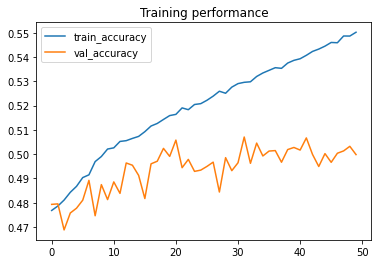

In [ ]:
plt.figure()
plt.title('Training performance')
plt.plot(start_run.epoch, start_run.history['accuracy'], label='train_accuracy')
plt.plot(start_run.epoch, start_run.history['val_accuracy'], label='val_accuracy')
plt.legend()

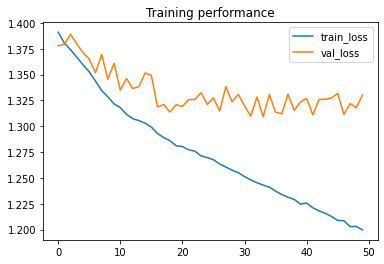

In [ ]:
plt.figure()
plt.title('Training performance')
plt.plot(start_run.epoch, start_run.history['loss'], label='train_loss')
plt.plot(start_run.epoch, start_run.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
#model=load_model(path_to_model)
model.load_weights("CNN_weights.best.hdf5")


In [ ]:
print(os.getcwd())

/content


In [ ]:
batch = 1024
y_pred = model.predict(x_test,batch)
score = model.evaluate(x_test, y_test, verbose=0, batch_size=batch)
print(score)

65/65 [==============================] - 1s 7ms/step
[1.3302689790725708, 0.4998030364513397]


In [ ]:

y_pred_label = model.predict(x_test,batch)
y_pred_classes=np.argmax(y_pred_label,axis=1)
y_test_label = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_test_label,y_pred_classes, normalize= 'true')


65/65 [==============================] - 0s 7ms/step


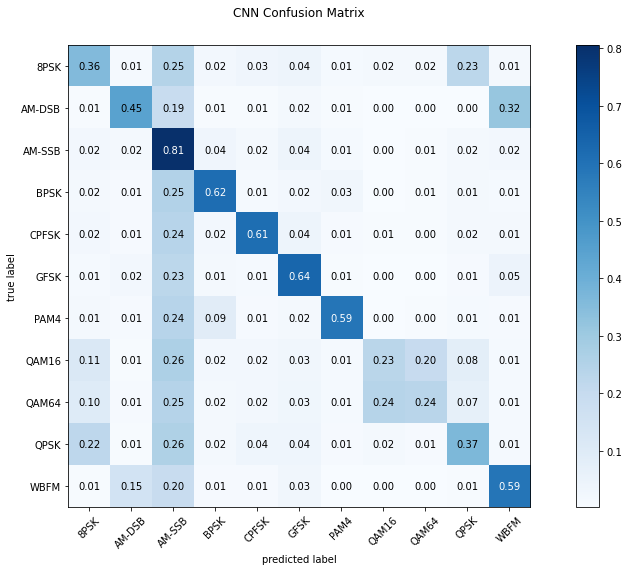

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test_label,y_pred_classes)
fg, ax = plot_confusion_matrix(cm,colorbar=True, show_absolute=False, show_normed=True)
ax.set_xticks(np.arange(len(modulation)))
ax.set_xticklabels(modulation, rotation = 45)
ax.set_title("CNN Confusion Matrix")
ax.set_yticks(np.arange(len(modulation)))
ax.set_yticklabels(modulation)
fg.set_size_inches(16.5, 8.5, forward=True)
